In [ ]:
##Exploratory Data Analysis##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")


Libraries imported successfully!


In [75]:
import os

local_path = r'C:\Users\rutu5\Desktop\BigDataProject'

# List all files in the directory
files = os.listdir(local_path)
print(files)


['Amazon.csv', 'Apple.csv', 'Facebook.csv', 'Google.csv', 'Netflix.csv']


In [76]:
import pandas as pd

local_path = r'C:\Users\rutu5\Desktop\BigDataProject'

# Load individual files
amazon_df = pd.read_csv(os.path.join(local_path, 'Amazon.csv'))
apple_df = pd.read_csv(os.path.join(local_path, 'Apple.csv'))
facebook_df = pd.read_csv(os.path.join(local_path, 'Facebook.csv'))
google_df = pd.read_csv(os.path.join(local_path, 'Google.csv'))
netflix_df = pd.read_csv(os.path.join(local_path, 'Netflix.csv'))

# Display the first few rows of Amazon data
print(amazon_df.head())


         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


In [77]:
print(amazon_df.info())
print(amazon_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 7 columns):
Date         5852 non-null object
Open         5852 non-null float64
High         5852 non-null float64
Low          5852 non-null float64
Close        5852 non-null float64
Adj Close    5852 non-null float64
Volume       5852 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 320.1+ KB
None
              Open         High          Low        Close    Adj Close  \
count  5852.000000  5852.000000  5852.000000  5852.000000  5852.000000   
mean    377.469557   381.737827   372.815253   377.500736   377.500736   
std     596.291033   602.615299   589.226694   596.287464   596.287464   
min       1.406250     1.447917     1.312500     1.395833     1.395833   
25%      37.995000    38.590000    37.247501    37.950001    37.950001   
50%      83.699997    85.029999    82.055000    83.602501    83.602501   
75%     360.852501   365.794991   357.877510   362.217506   362.2

In [10]:
import seaborn as sns

In [72]:
# Add a source column to track the dataset origin
amazon_df['Source'] = 'Amazon'
apple_df['Source'] = 'Apple'
facebook_df['Source'] = 'Facebook'
google_df['Source'] = 'Google'
netflix_df['Source'] = 'Netflix'

# Concatenate all datasets
all_data = pd.concat([amazon_df, apple_df, facebook_df, google_df, netflix_df], ignore_index=True)

# Check the combined dataset
print(all_data.head())


   Adj Close     Close Date      High       Low      Open  Source      Volume
0   1.958333  1.958333  NaN  2.500000  1.927083  2.437500  Amazon  72156000.0
1   1.729167  1.729167  NaN  1.979167  1.708333  1.968750  Amazon  14700000.0
2   1.708333  1.708333  NaN  1.770833  1.625000  1.760417  Amazon   6106800.0
3   1.635417  1.635417  NaN  1.750000  1.635417  1.729167  Amazon   5467200.0
4   1.427083  1.427083  NaN  1.645833  1.375000  1.635417  Amazon  18853200.0


In [28]:
# Average closing prices by company
avg_close = all_data.groupby('Source')['Close'].mean()
print(avg_close)


Source
Amazon      377.500736
Apple         9.018933
Facebook    117.410400
Google      533.999060
Netflix      78.072056
Name: Close, dtype: float64


In [30]:
import seaborn as sns
print(sns.__version__)


0.8.1


In [38]:
!pip install --upgrade seaborn


  Using cached seaborn-0.9.1-py2.py3-none-any.whl (216 kB)
  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)


DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


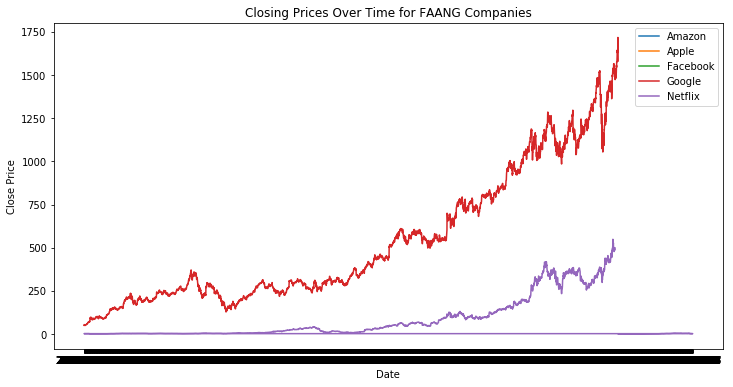

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for source in all_data['Source'].unique():
    subset = all_data[all_data['Source'] == source]
    plt.plot(subset['Date'], subset['Close'], label=source)

plt.title('Closing Prices Over Time for FAANG Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [70]:
# Add a column to indicate the data source
amazon_df['Source'] = 'Amazon'
apple_df['Source'] = 'Apple'
facebook_df['Source'] = 'Facebook'
google_df['Source'] = 'Google'
netflix_df['Source'] = 'Netflix'

# Combine all datasets
all_data = pd.concat([amazon_df, apple_df, facebook_df, google_df, netflix_df], ignore_index=True)

# Convert 'Date' column to datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Normalize the 'Close' column
all_data['Normalized_Close'] = all_data.groupby('Source')['Close'].transform(lambda x: x / x.iloc[0])

# Display the combined data
print(all_data.head())


   Adj Close     Close Date      High       Low      Open  Source      Volume  \
0   1.958333  1.958333  NaT  2.500000  1.927083  2.437500  Amazon  72156000.0   
1   1.729167  1.729167  NaT  1.979167  1.708333  1.968750  Amazon  14700000.0   
2   1.708333  1.708333  NaT  1.770833  1.625000  1.760417  Amazon   6106800.0   
3   1.635417  1.635417  NaT  1.750000  1.635417  1.729167  Amazon   5467200.0   
4   1.427083  1.427083  NaT  1.645833  1.375000  1.635417  Amazon  18853200.0   

   Normalized_Close  
0          1.000000  
1          0.882979  
2          0.872340  
3          0.835107  
4          0.728723  


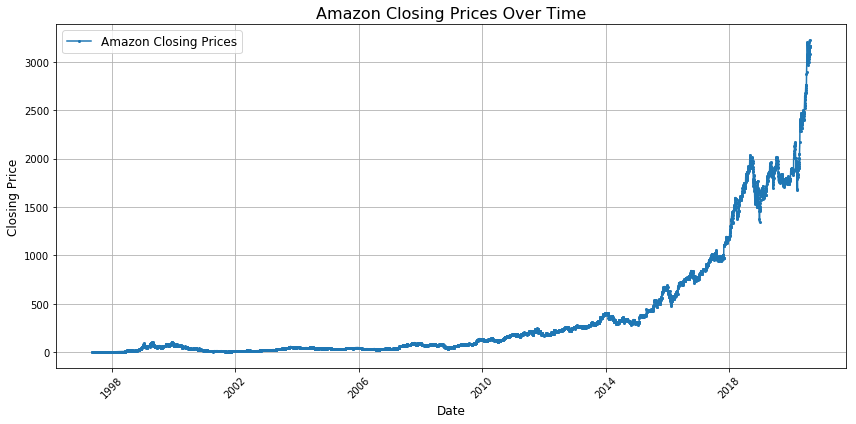

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming amazon_df is your dataframe
# Correctly parse the 'Date' column
try:
    amazon_df["Date"] = pd.to_datetime(amazon_df["Date"], format="%Y-%m-%d")
except ValueError:
    print("Date parsing failed. Check the format of the 'Date' column.")
    print(amazon_df["Date"].head())

# Plot the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(amazon_df["Date"], amazon_df["Close"], label="Amazon Closing Prices", marker="o", markersize=2)

# Title and labels
plt.title("Amazon Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


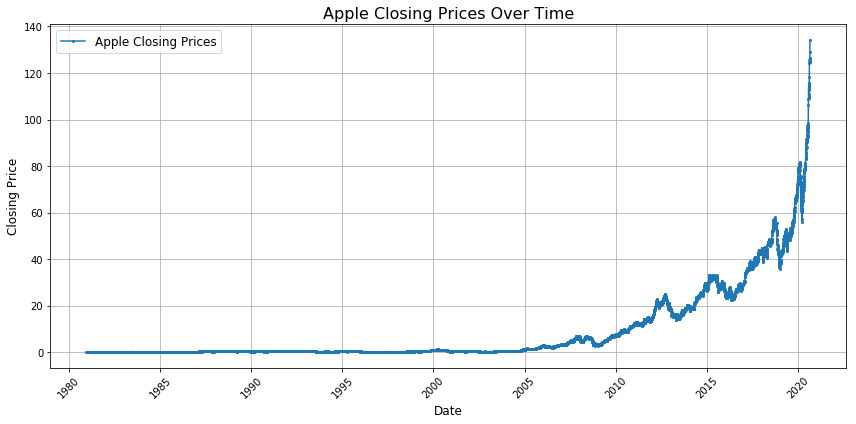

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming amazon_df is your dataframe
# Correctly parse the 'Date' column
try:
    apple_df["Date"] = pd.to_datetime(apple_df["Date"], format="%Y-%m-%d")
except ValueError:
    print("Date parsing failed. Check the format of the 'Date' column.")
    print(apple_df["Date"].head())

# Plot the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(apple_df["Date"], apple_df["Close"], label="Apple Closing Prices", marker="o", markersize=2)

# Title and labels
plt.title("Apple Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


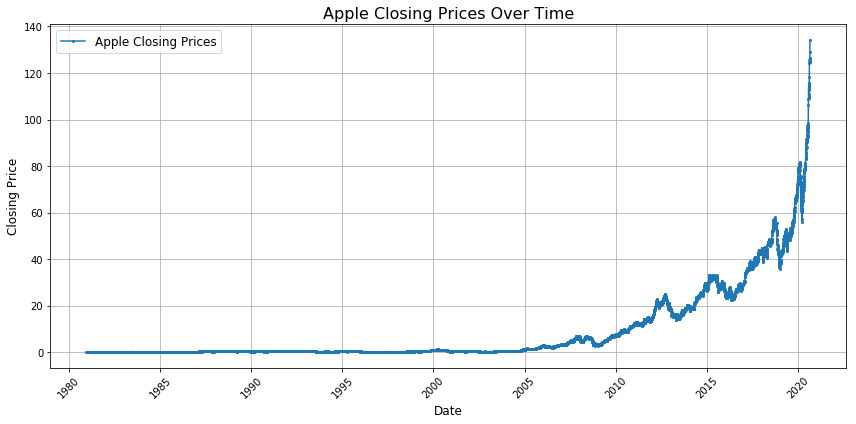

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming amazon_df is your dataframe
# Correctly parse the 'Date' column
try:
    apple_df["Date"] = pd.to_datetime(apple_df["Date"], format="%Y-%m-%d")
except ValueError:
    print("Date parsing failed. Check the format of the 'Date' column.")
    print(apple_df["Date"].head())

# Plot the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(apple_df["Date"], apple_df["Close"], label="Apple Closing Prices", marker="o", markersize=2)

# Title and labels
plt.title("Apple Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


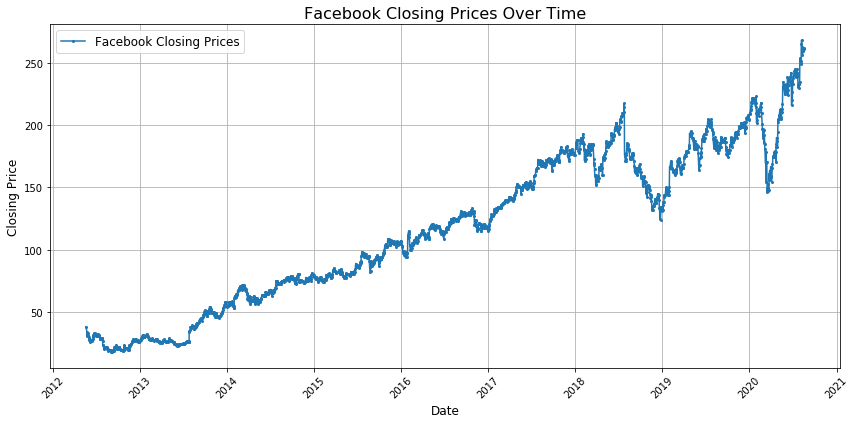

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming amazon_df is your dataframe
# Correctly parse the 'Date' column
try:
    facebook_df["Date"] = pd.to_datetime(facebook_df["Date"], format="%Y-%m-%d")
except ValueError:
    print("Date parsing failed. Check the format of the 'Date' column.")
    print(facebook_df["Date"].head())

# Plot the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(facebook_df["Date"], facebook_df["Close"], label="Facebook Closing Prices", marker="o", markersize=2)

# Title and labels
plt.title("Facebook Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


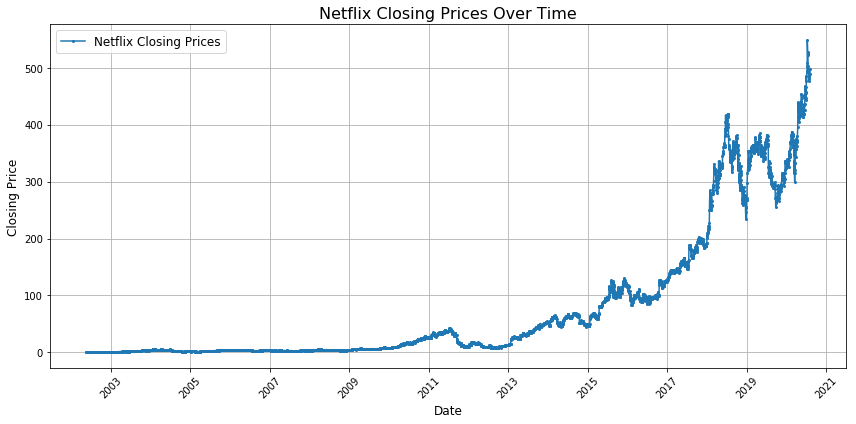

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming amazon_df is your dataframe
# Correctly parse the 'Date' column
try:
    netflix_df["Date"] = pd.to_datetime(netflix_df["Date"], format="%Y-%m-%d")
except ValueError:
    print("Date parsing failed. Check the format of the 'Date' column.")
    print(netflix_df["Date"].head())

# Plot the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(netflix_df["Date"], netflix_df["Close"], label="Netflix Closing Prices", marker="o", markersize=2)

# Title and labels
plt.title("Netflix Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


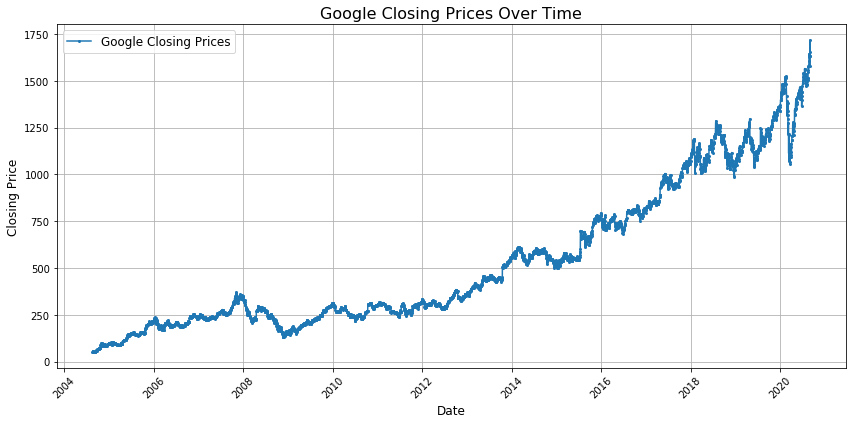

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming amazon_df is your dataframe
# Correctly parse the 'Date' column
try:
    google_df["Date"] = pd.to_datetime(google_df["Date"], format="%Y-%m-%d")
except ValueError:
    print("Date parsing failed. Check the format of the 'Date' column.")
    print(google_df["Date"].head())

# Plot the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(google_df["Date"], google_df["Close"], label="Google Closing Prices", marker="o", markersize=2)

# Title and labels
plt.title("Google Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
# Check null values for individual datasets
print("Null values in Amazon dataset:")
print(amazon_df.isnull().sum())
print("\nNull values in Apple dataset:")
print(apple_df.isnull().sum())
print("\nNull values in Facebook dataset:")
print(facebook_df.isnull().sum())
print("\nNull values in Google dataset:")
print(google_df.isnull().sum())
print("\nNull values in Netflix dataset:")
print(netflix_df.isnull().sum())


Null values in Amazon dataset:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Source       0
dtype: int64

Null values in Apple dataset:
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Source       0
dtype: int64

Null values in Facebook dataset:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Source       0
dtype: int64

Null values in Google dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Source       0
dtype: int64

Null values in Netflix dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Source       0
dtype: int64


In [52]:
# Fill null values with the mean of each column
netflix_df_filled = netflix_df.fillna(netflix_df.mean())

# Verify null values are handled
print("Null values in Netflix dataset after filling with mean:")
print(netflix_df_filled.isnull().sum())


Null values in Netflix dataset after filling with mean:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Source       0
dtype: int64


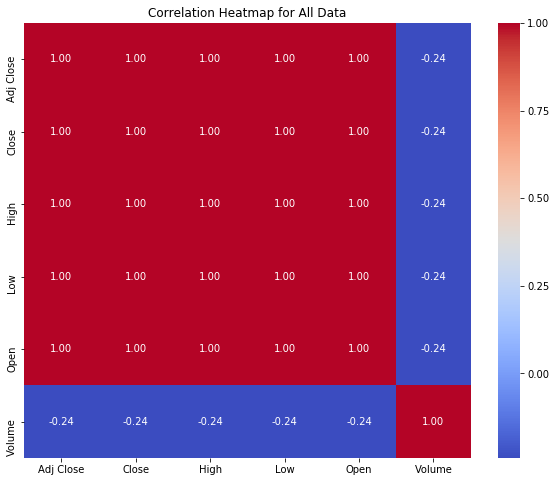

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a correlation heatmap for all numerical columns in the dataset
plt.figure(figsize=(10, 8))
correlation_matrix = all_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for All Data")
plt.show()
